In [50]:
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina") # retina 설정

plt.style.use("seaborn-whitegrid") # 스타일 지정

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
raw = pd.read_csv('/content/drive/MyDrive/하영/캐글데이터로데이터분석하기/kaggle_survey_2020_responses.csv')
question = raw.iloc[0]
answer = raw.drop([0]) # 0번째를 제외하고 나머지

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Q7 What programming languages do you use on a regular basis? (Select all that apply)
- pandas filter & describe 사용!

In [53]:
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [54]:
question.filter("Q7") # 정확히 Q7과 매치되는 것

Series([], Name: 0, dtype: object)

In [55]:
question.filter(regex="Q7") # Q7이 들어가는 것. regex 정규식

Q7_Part_1     What programming languages do you use on a reg...
Q7_Part_2     What programming languages do you use on a reg...
Q7_Part_3     What programming languages do you use on a reg...
Q7_Part_4     What programming languages do you use on a reg...
Q7_Part_5     What programming languages do you use on a reg...
Q7_Part_6     What programming languages do you use on a reg...
Q7_Part_7     What programming languages do you use on a reg...
Q7_Part_8     What programming languages do you use on a reg...
Q7_Part_9     What programming languages do you use on a reg...
Q7_Part_10    What programming languages do you use on a reg...
Q7_Part_11    What programming languages do you use on a reg...
Q7_Part_12    What programming languages do you use on a reg...
Q7_OTHER      What programming languages do you use on a reg...
Name: 0, dtype: object

In [56]:
question.filter(regex="Q7")[0]

'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'

In [57]:
question.filter(regex="Q7")[0].split("-")[0]

'What programming languages do you use on a regular basis? (Select all that apply) '

In [58]:
answer_Q7 = answer.filter(regex="Q7")
answer_Q7

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,Python,NaN,SQL,C,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# NaN = 결측치, Q7_Part_1의 Python 응답수만 알아보려고 할 때
# answer_Q7.isnull()
answer_Q7.notnull().sum()
# 이건 파이썬인지 SQL인지 모름

Q7_Part_1     15530
Q7_Part_2      4277
Q7_Part_3      7535
Q7_Part_4      3315
Q7_Part_5      3827
Q7_Part_6      3367
Q7_Part_7      2995
Q7_Part_8       262
Q7_Part_9       198
Q7_Part_10     1776
Q7_Part_11     2217
Q7_Part_12      206
Q7_OTHER       1945
dtype: int64

In [60]:
answer_Q7.describe() # 기술 통계 값
# unique가 1이기 때문에 언어 하나 말고는 다 결측치라는 소리
# top과 count를 활용하면 되겠다고 보임

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
freq,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945


In [61]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
freq,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945


In [62]:
answer_Q7_desc.loc["top"] # 행 가져올 때는 loc사용

Q7_Part_1         Python
Q7_Part_2              R
Q7_Part_3            SQL
Q7_Part_4              C
Q7_Part_5            C++
Q7_Part_6           Java
Q7_Part_7     Javascript
Q7_Part_8          Julia
Q7_Part_9          Swift
Q7_Part_10          Bash
Q7_Part_11        MATLAB
Q7_Part_12          None
Q7_OTHER           Other
Name: top, dtype: object

In [63]:
# answer_Q7_desc.loc["top", "count"] # 2개 이상 사용할 떄는 리스트로 사용해야 함.
answer_Q7_desc.loc[["top", "count"]]

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945


In [64]:
# 행 값을 컬럼으로 오게 하기 위해 T 사용. 행과열 바꿔줌.
# answer_Q7_desc.loc[["top", "count"]].T
# 그 다음에 top별로 빈도수 가져오기
answer_Q7_desc.loc[["top", "count"]].T.set_index("top")

,count
top,
Python,15530
R,4277
SQL,7535
C,3315
C++,3827
Java,3367
Javascript,2995
Julia,262
Swift,198


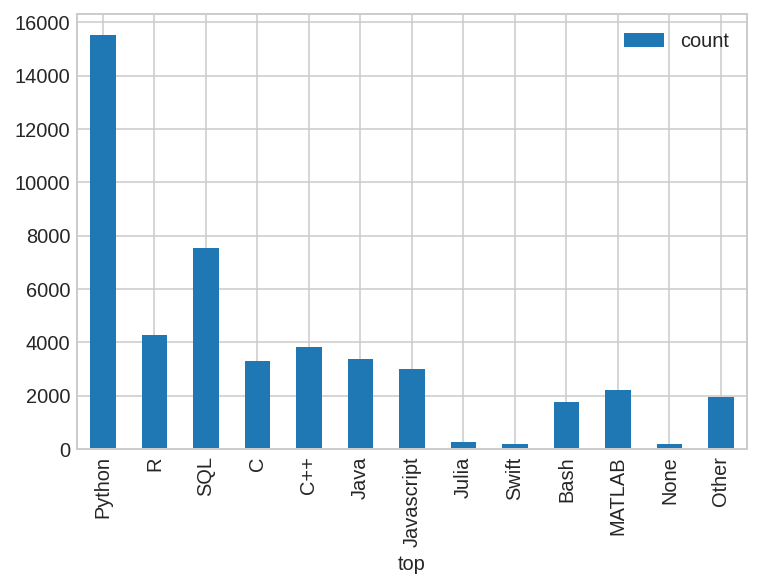

In [65]:
answer_Q7_desc.loc[["top", "count"]].T.set_index("top").plot.bar()

In [66]:
answer_Q7_count = answer_Q7_desc.loc[["top", "count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending=False)
answer_Q7_count

,count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


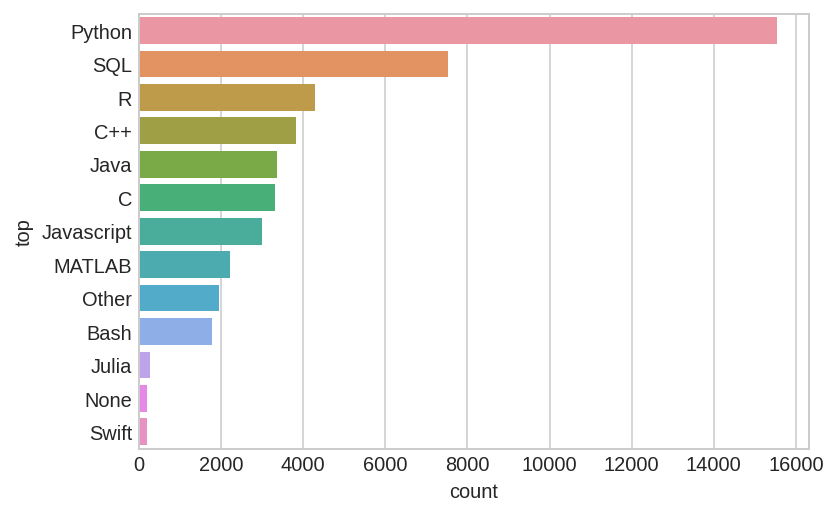

In [67]:
sns.barplot(data=answer_Q7_count, y=answer_Q7_count.index, x="count")

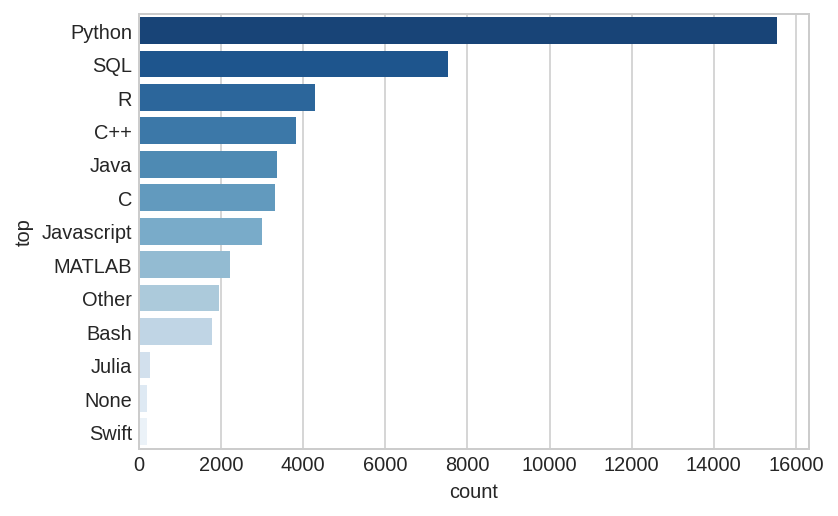

In [68]:
sns.barplot(data=answer_Q7_count, y=answer_Q7_count.index, x="count", palette="Blues_r")

In [69]:
question.filter(regex="Q7")
question.filter(regex="Q7")[0]
question.filter(regex="Q7")[0].split("-")
q7_title = question.filter(regex="Q7")[0].split("-")[0]
q7_title

'What programming languages do you use on a regular basis? (Select all that apply) '

Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply) ')

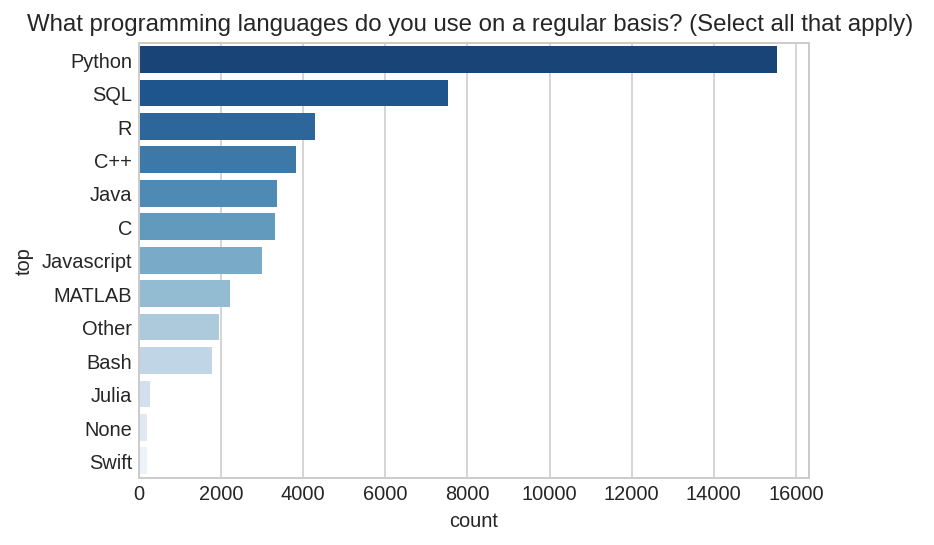

In [70]:
sns.barplot(data=answer_Q7_count, y=answer_Q7_count.index, x="count", palette="Blues_r").set_title(q7_title)

### define get_question_title function

In [71]:
# multiple choice 에 대해 함수화 해놓기(answer 사용방법)
def get_question_title_by_qno(qno):
  if qno in question.index:
    return question[qno]
  else:
    q_no = anaswer.filter(regex=qno).columns[0]
    q_no = question[q_no].split("-")[0]
    return q_no

In [72]:
def get_question_title_by_qno(qno):
  return question[qno]

In [73]:
# get_question_title_by_qno("Q1") # Q1~Q6 까지는 문제 없음.
get_question_title_by_qno("Q7")

KeyError: ignored

In [74]:
def get_question_title_by_qno(qno):
  try:
    return question[qno]
  except:
    return qno
    
get_question_title_by_qno("Q7")

'Q7'

In [75]:
# Q7부터의 타이틀을 가져오기 위해 추가

def get_question_title_by_qno(qno):
  if qno in question.index:
    return question[qno]
  else:
    q_no = question.filter(regex=qno)[0]
    return q_no

get_question_title_by_qno("Q7")

'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'

In [109]:
# 선택항목 제외하고 가져오기 "-"로 나누기

# (question) 사용방법)
def get_question_title_by_qno(qno):
  if qno in question.index:
    return question[qno]
  else:
    q_no = question.filter(regex=qno)[0].split("-")[0]
    return q_no

get_question_title_by_qno("Q7")

'What programming languages do you use on a regular basis? (Select all that apply) '

### define get_multiple_choice_answer function

In [110]:
# qno에 따라서 multiple choice answer에 대한 빈도수 가져오기 함수
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  answer_count = answer_desc.loc[["top","count"]].T.set_index("top")
  answer_count = answer_count.sort_values("count", ascending=False)
  return answer_count

In [111]:
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  return df_answer

get_multiple_choice_answer_by_qno("Q7")

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,Python,NaN,SQL,C,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  return answer_desc

get_multiple_choice_answer_by_qno("Q7")

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
freq,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945


In [113]:
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  return answer_desc.loc[["top", "count"]]

get_multiple_choice_answer_by_qno("Q7")

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945


In [114]:
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  return answer_desc.loc[["top", "count"]].T # 행열 바꾸기
# top이 인덱스로 있어야 시각화를 할 때 유용하다.
get_multiple_choice_answer_by_qno("Q7")

,top,count
Q7_Part_1,Python,15530
Q7_Part_2,R,4277
Q7_Part_3,SQL,7535
Q7_Part_4,C,3315
Q7_Part_5,C++,3827
Q7_Part_6,Java,3367
Q7_Part_7,Javascript,2995
Q7_Part_8,Julia,262
Q7_Part_9,Swift,198
Q7_Part_10,Bash,1776


In [115]:
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  return answer_desc.loc[["top", "count"]].T.set_index("top")

get_multiple_choice_answer_by_qno("Q7")

,count
top,
Python,15530
R,4277
SQL,7535
C,3315
C++,3827
Java,3367
Javascript,2995
Julia,262
Swift,198


In [116]:
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  answer_count = answer_desc.loc[["top", "count"]].T.set_index("top")
  answer_count = answer_count.sort_values(by="count", ascending=False)
  return answer_count

get_multiple_choice_answer_by_qno("Q7")
get_multiple_choice_answer_by_qno("Q8")
get_multiple_choice_answer_by_qno("Q9")

,count
top,
"Jupyter (JupyterLab, Jupyter Notebooks, etc)",11211
Visual Studio Code (VSCode),5873
PyCharm,5099
RStudio,3826
Spyder,3290
Notepad++,3132
Sublime Text,2452
Visual Studio,2445
MATLAB,1604


### define show_multiple_choice_bar_plot_by_qno function

In [117]:
def show_multiple_choice_bar_plot_by_qno(qno):
  multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)

  plt.figure(figsize=(10,6))
  sns.barplot(data=multiple_choice_answer, y=multiple_choice_answer.index, 
              x="count", palette="Blues_r"
              ).set_title(get_question_title_by_qno(qno))

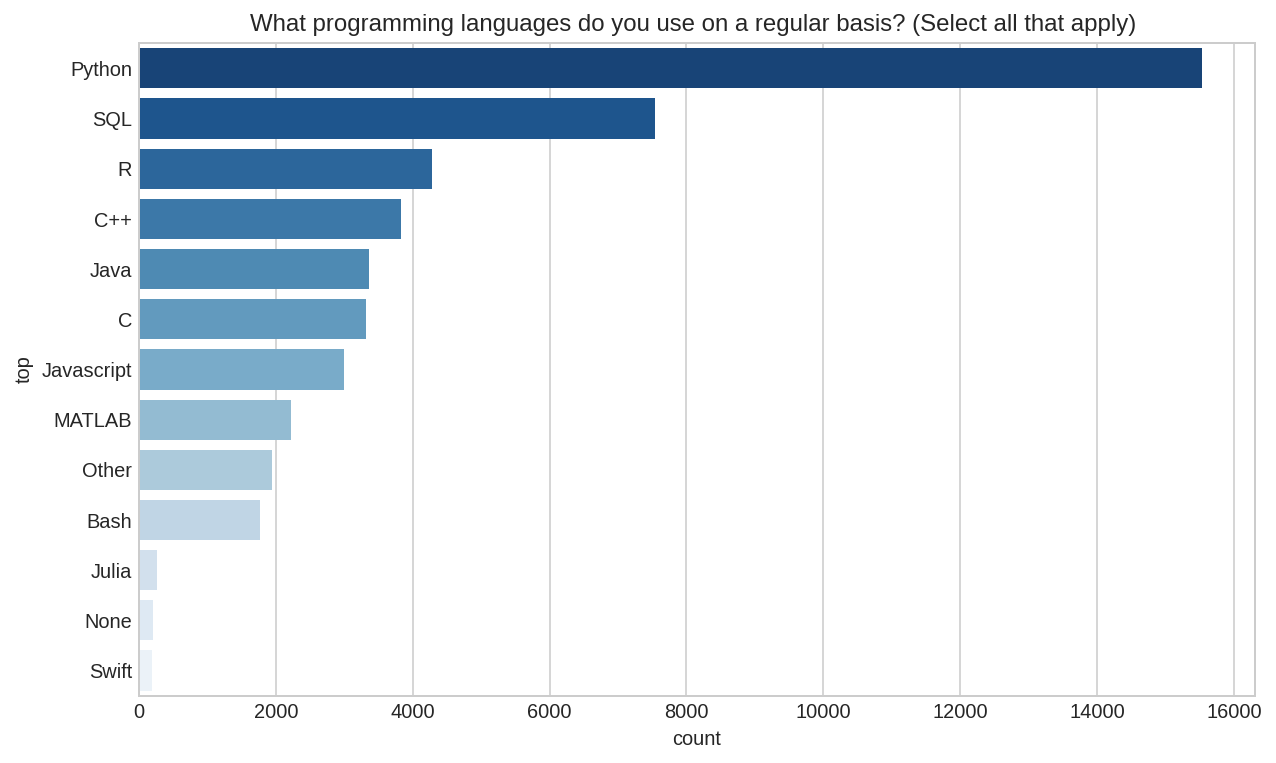

In [118]:
show_multiple_choice_bar_plot_by_qno("Q7")

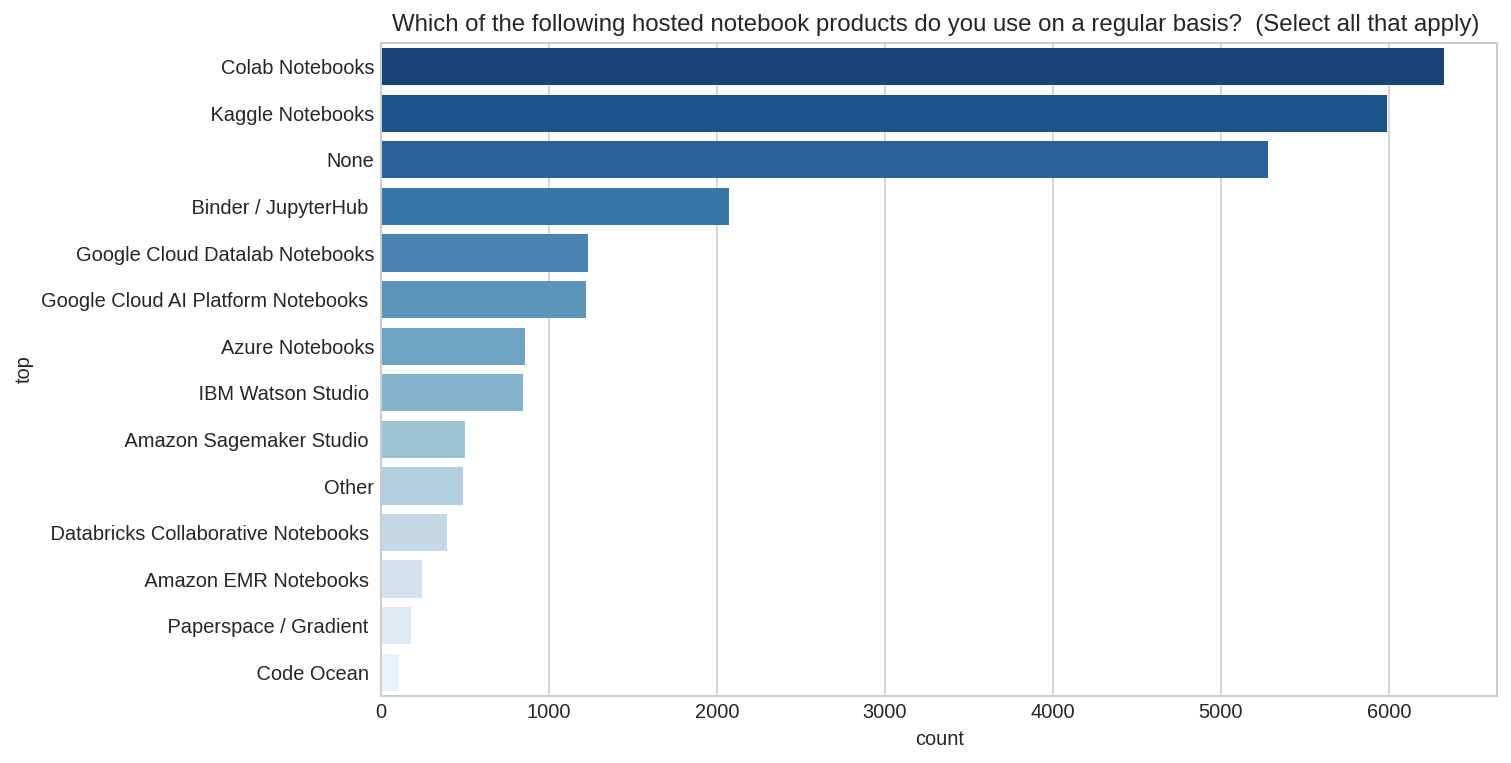

In [119]:
show_multiple_choice_bar_plot_by_qno("Q10")

In [120]:
# single choice 경우
pd.crosstab(answer["Q5"], answer["Q2"])

Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Q5,,,,,
Business Analyst,627,3,11,1,156
Currently not employed,1235,4,30,7,376
DBA/Database Engineer,103,2,4,0,16
Data Analyst,1110,1,11,5,348
Data Engineer,369,0,7,1,60
Data Scientist,2194,8,28,8,438
Machine Learning Engineer,928,0,14,4,136
Other,1418,2,21,4,292
Product/Project Manager,603,1,8,2,78


In [121]:
answer.filter(regex="Q7").describe().loc["top"]
q7_cols = answer.filter(regex="Q7").describe().loc["top"].tolist()
q7_cols

['Python',
 'R',
 'SQL',
 'C',
 'C++',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'None',
 'Other']

In [122]:
# multiple choice 경우

# pd.crosstab(answer["Q7"], answer["Q2"]) # 오류
# answer.filter(regex="Q7|Q2") # Q2로 시작하는 것도 다 가져옴.(Q29 이런거까지)
q2q7 = answer.filter(regex="Q7|^Q2$") # ^:시작, $:끝
q2q7

,Q2,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Man,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Man,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Man,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Man,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Man,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,Woman,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Man,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,Man,Python,NaN,SQL,C,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
q2q7_count = q2q7.groupby("Q2").count() # Q2를 기준으로 groupby하고 빈도수 계산
q2q7_count.columns = q7_cols # Q7_Part_1 이런거를 top의 값으로 바꾼 것
q2q7_count

,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
Q2,,,,,,,,,,,,,
Man,12530,3299,5940,2552,3063,2641,2487,238,171,1561,1679,149,1634
Nonbinary,41,14,20,8,10,1,6,1,2,10,7,0,7
Prefer not to say,182,48,97,36,43,42,41,5,4,31,28,6,31
Prefer to self-describe,41,8,18,12,13,9,12,2,1,10,6,0,7
Woman,2736,908,1460,707,698,674,449,16,20,164,497,51,266


In [124]:
# 남녀 빈도수만 보려고 하면
q2q7_count.loc[["Man", "Woman"]] # loc: 행 인덱스

,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
Q2,,,,,,,,,,,,,
Man,12530,3299,5940,2552,3063,2641,2487,238,171,1561,1679,149,1634
Woman,2736,908,1460,707,698,674,449,16,20,164,497,51,266


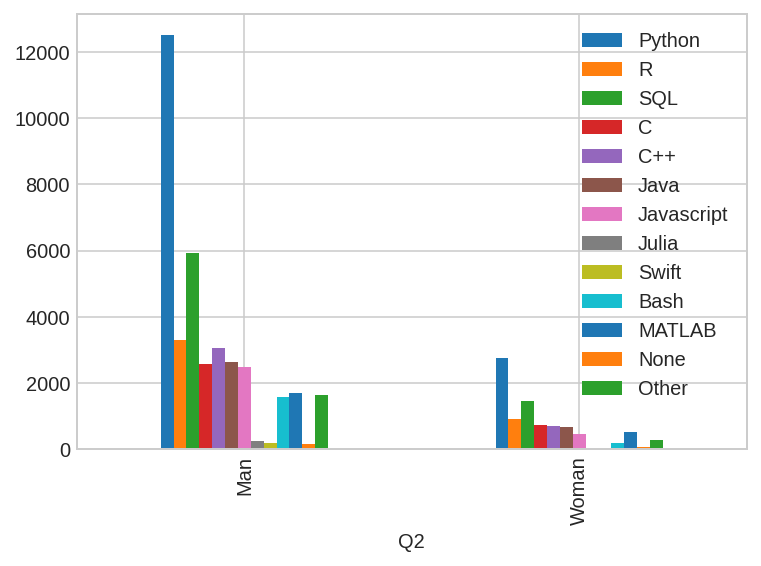

In [125]:
q2q7_count.loc[["Man", "Woman"]].plot.bar()

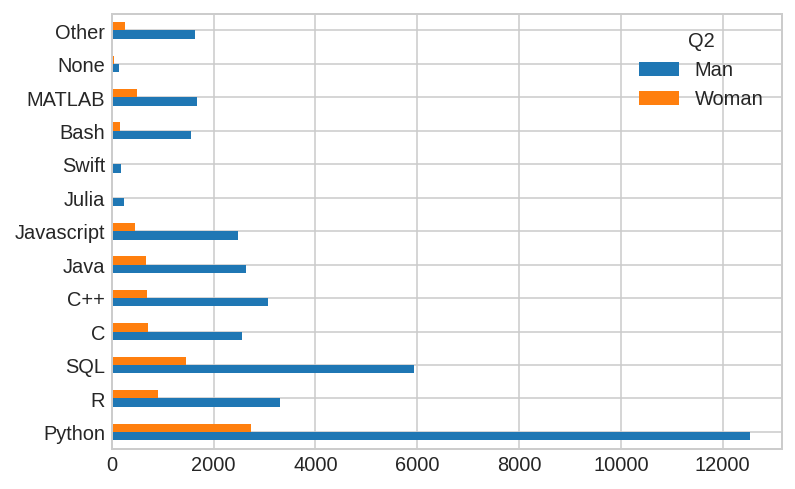

In [126]:
# 언어를 x축에 두고 싶을 때
q2q7_count.loc[["Man", "Woman"]].T.plot.barh()

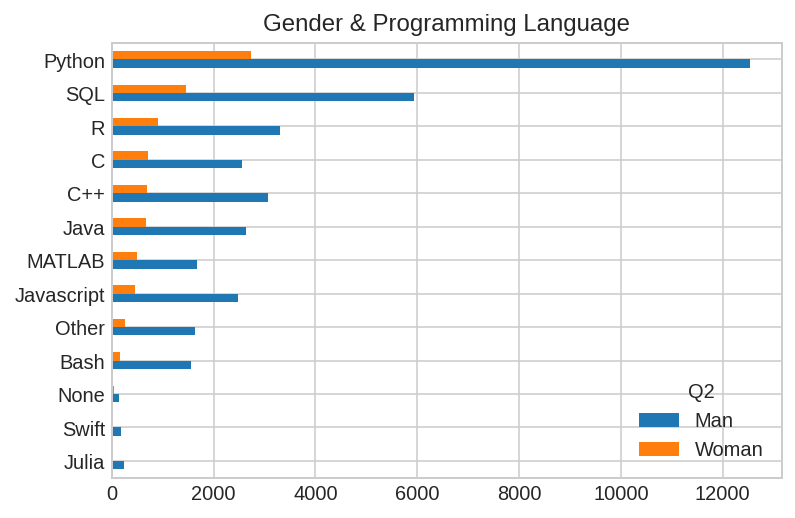

In [127]:
# 빈도수 높은 순서대로
q2q7_count.loc[["Man", "Woman"]].T.sort_values("Woman").plot.barh(title="Gender & Programming Language")

In [132]:
def show_countplot_by_qno(qno, fsize=(10,6), order=None):
  if not order:
    order = answer[qno].value_counts().index
  plt.figure(figsize=fsize)
  sns.countplot(data=answer, y=qno, 
                order=order, palette="Blues_r"
                ).set_title(question[qno])

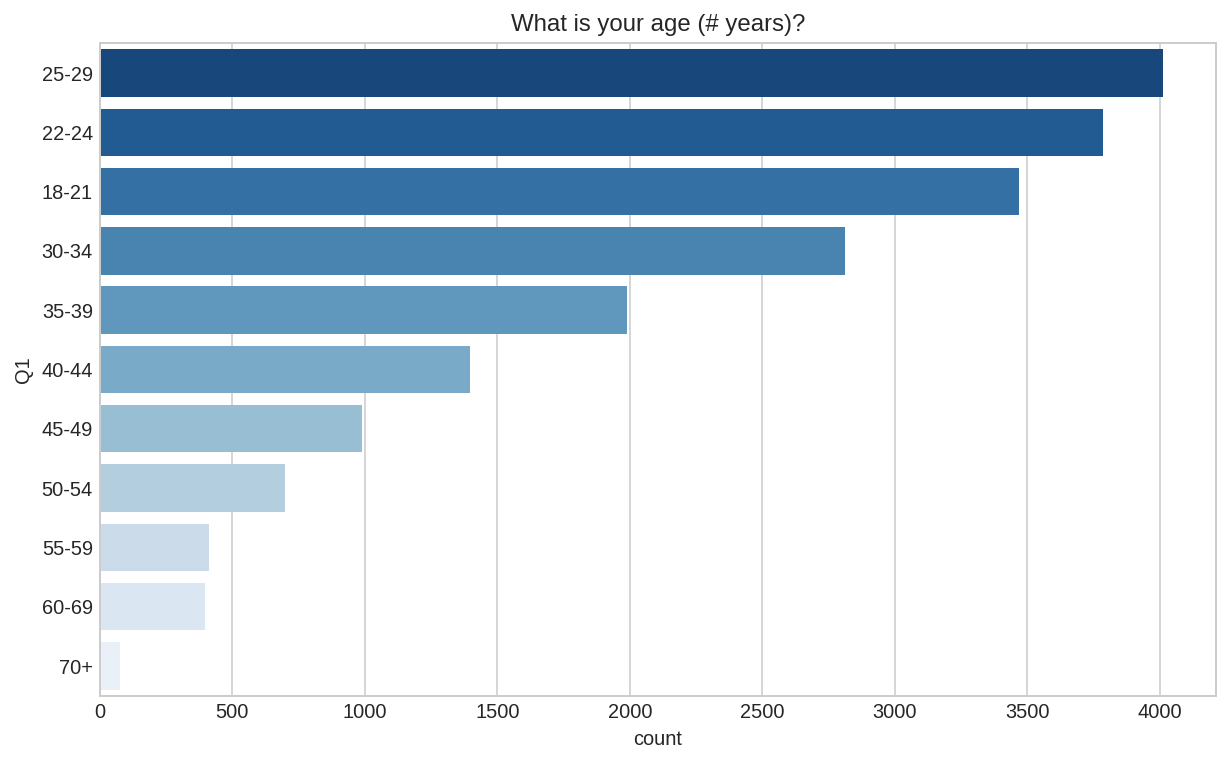

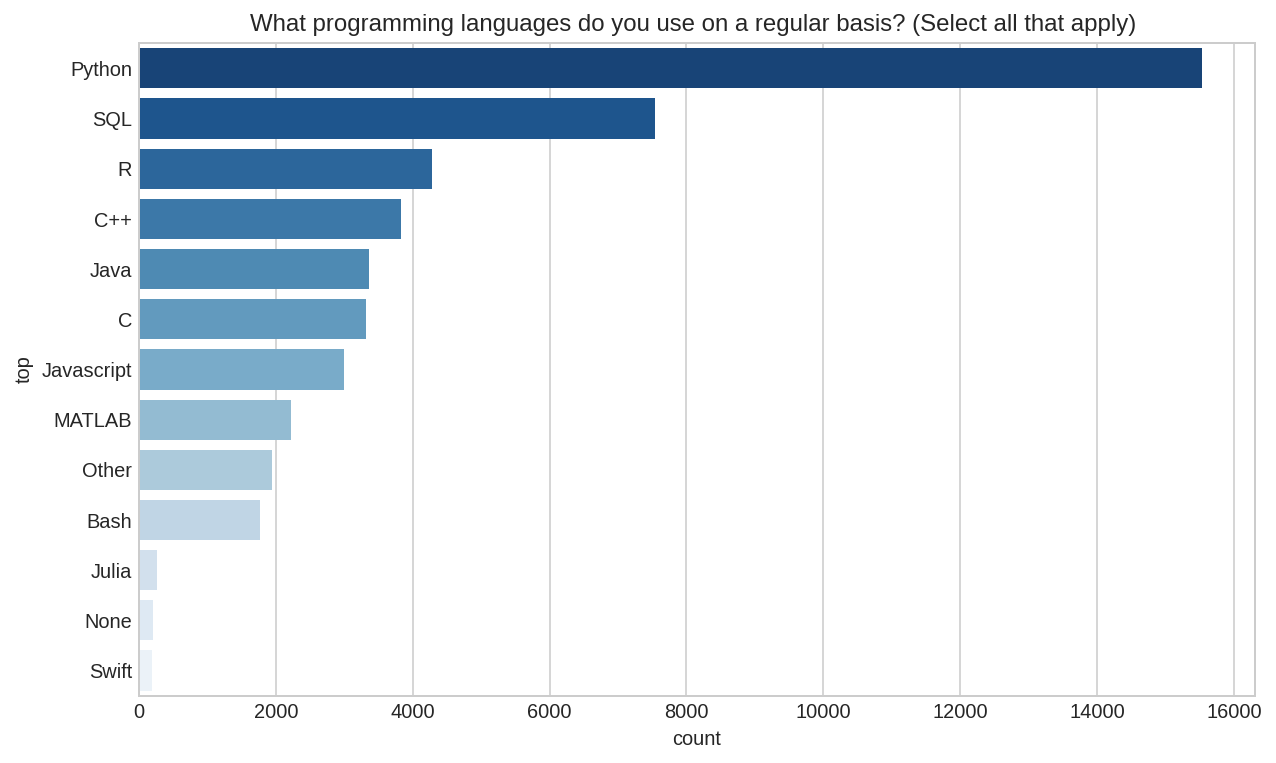

In [133]:
# single choice든 multiple choice든 한번에 시각화하는 함수화하기
show_countplot_by_qno("Q1")
show_multiple_choice_bar_plot_by_qno("Q7")
# -> 지금은 따로따로지만, qno만 넘겨주면 알아서 signle인지 multiple인지 판단하고 시각화하는 함수 만들기

In [134]:
question.index # 컬럼명들

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [135]:
def show_plot_by_qno(qno):
  if qno in question.index: # 컬럼명에 확실히 qno가 있느냐
    show_countplot_by_qno(qno)
  else:
    show_multiple_choice_bar_plot_by_qno(qno)

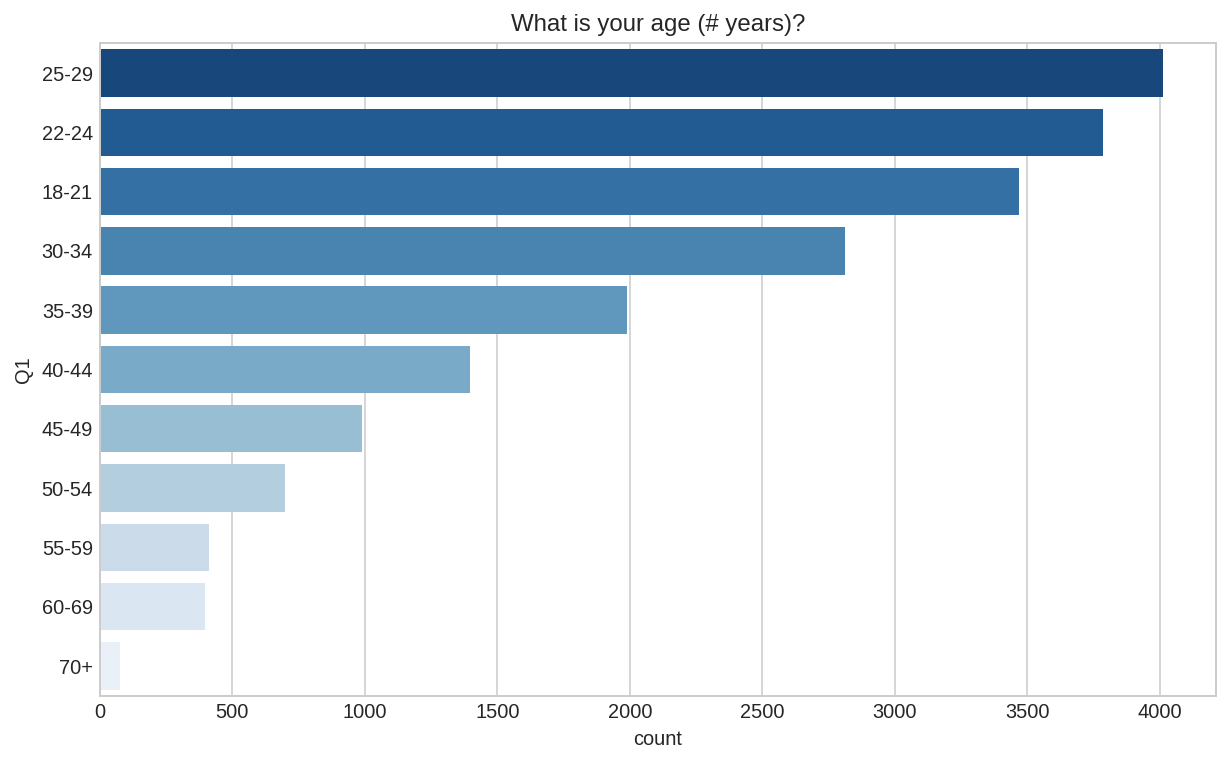

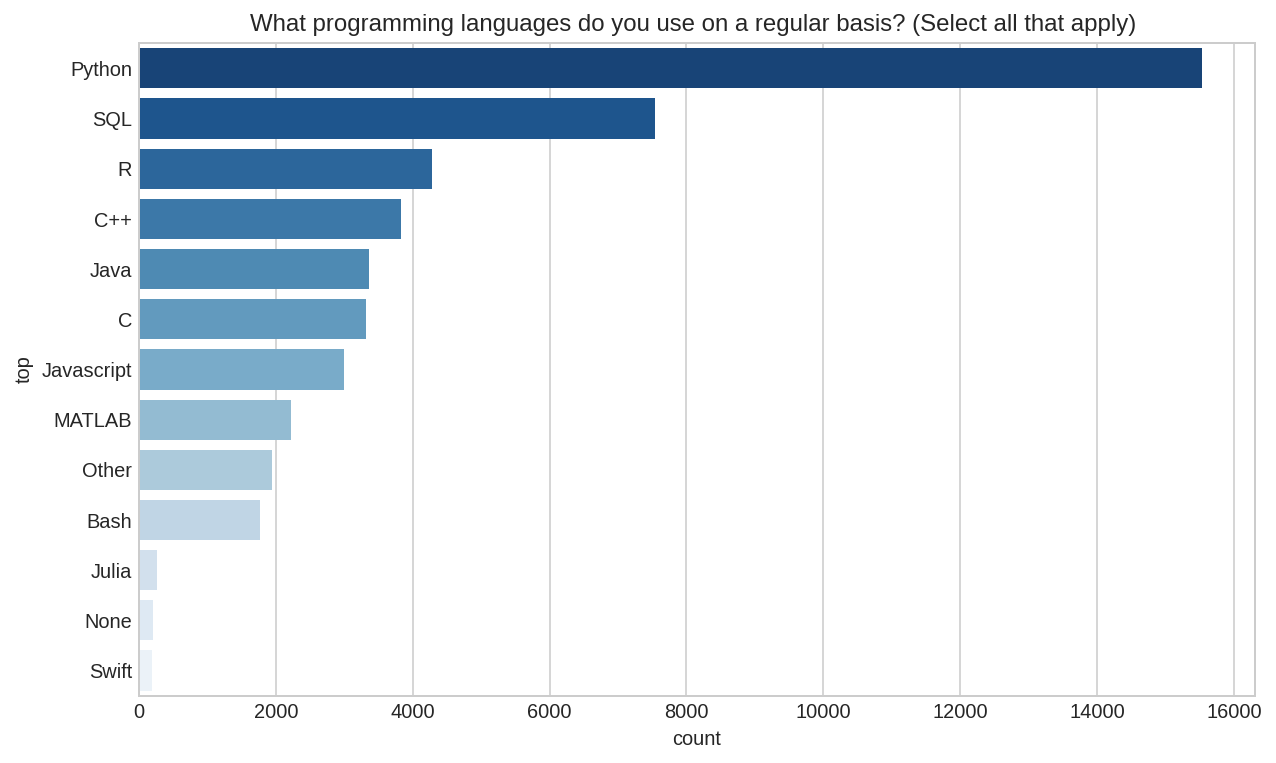

In [136]:
show_plot_by_qno("Q1")
show_plot_by_qno("Q7")